In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Step 1 : Data loading

In [7]:
Movie = pd.read_csv(r"C:\Users\NAMAN\Downloads\movies.csv")
Rating = pd.read_csv(r"C:\Users\NAMAN\Downloads\ratings.csv")

Step 2 : Data cleaning

In [8]:
print(Movie.shape)
Movie.head()

(10329, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
print(Movie.isna().sum()) # check for null vals
print(Movie.info())

movieId    0
title      0
genres     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB
None


In [10]:
print(Movie.duplicated().sum()) # check for duplicated vals
Movie.describe() # summary statistics

0


,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [11]:
print(Rating.shape)
Rating.head()

(105339, 4)


,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [12]:
print(Rating.isna().sum())
print(Rating.info())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB
None


In [13]:
print(Rating.duplicated().sum())
print(Rating['movieId'].value_counts()) # The count value of ratings for each movie

0
movieId
296       325
356       311
318       308
480       294
593       290
         ... 
133583      1
132961      1
132883      1
132800      1
132796      1
Name: count, Length: 10325, dtype: int64


In [14]:
Rating.describe() # summary statistics

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [15]:
def fetch_title_year(obj):
    title = obj[:obj.index('(')].strip()                                            # taking the substring before the first '(' and removing any leading spaces
    year = obj[obj.index('(') + 1:obj.index(')')]                                   # taking the substring between the first '(' and the first ')'
    return title, year

Movie[['title', 'year']] = Movie['title'].apply(lambda x: pd.Series(fetch_title_year(x)))

In [16]:
Movie['genres'] = Movie['genres'].str.replace('|',',')

In [17]:
Rating['timestamp'] = pd.to_datetime(Rating['timestamp'],unit='s')          # changed timestamp to a proper data and time 

In [18]:
df = Movie.merge(Rating,on='movieId')                                       # Merge the 'Movie' and 'Rating' DataFrames
df.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy",1995,2,5.0,1997-03-22 16:08:15
1,1,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy",1995,5,4.0,2011-04-22 19:37:19
2,1,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy",1995,8,5.0,1997-03-17 15:02:13
3,1,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy",1995,11,4.0,1996-12-17 09:43:30
4,1,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy",1995,14,4.0,1996-12-28 09:44:46


In [19]:
print(df.shape)
df.describe()

(105339, 7)


,movieId,userId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,105339
mean,13381.312477,364.924539,3.516850,2005-10-27 14:39:31.974254592
min,1.000000,1.000000,0.500000,1996-04-03 20:55:54
25%,1073.000000,192.000000,3.000000,2000-10-09 14:13:17.500000
50%,2497.000000,383.000000,3.500000,2005-05-03 21:00:56
75%,5991.000000,557.000000,4.000000,2010-06-02 16:26:38.500000
max,149532.000000,668.000000,5.000000,2016-01-10 05:48:39
std,26170.456869,197.486905,1.044872,NaN


In [20]:
df['title'].value_counts() # Count the occurrences of each movietitle

title
Pulp Fiction                       325
Forrest Gump                       311
Shawshank Redemption, The          308
Jurassic Park                      294
Silence of the Lambs, The          290
                                  ... 
Plenty                               1
Assassination                        1
Runoff                               1
Women of the Prehistoric Planet      1
Velocity of Gary, The                1
Name: count, Length: 9944, dtype: int64

Objective(num 1)

Create a popularity based recommender system at a genre level :-

In [21]:
def recommender(genre, review_threshold, Num_recommendations):
    movie_genre = df[df['genres'].str.contains(genre)]                                                  # Filter the dataframe to include only movies that belong to specied genres
    vals = movie_genre.groupby(['title']).agg({'rating': ['mean', 'count']}).reset_index()              # Group the filtered DataFrame by 'title' and calculate the mean rating and the count
    vals.columns=['title','Avg_rating','num_reviews']                                                   # change the column names
    filtered_vals = vals[vals['num_reviews'] >= review_threshold]                                       # Filter the dataframe to include only movies greater and equal to reviews
    top_movies = filtered_vals.sort_values('Avg_rating',ascending=False).head(Num_recommendations)      # Sort the movies(descending order) and select the top N recommendations
    return top_movies

In [22]:
Top5_Movies = recommender('Drama',100,5)
Top5_Movies.head()                                 # calling the function

,title,Avg_rating,num_reviews
4015,"Shawshank Redemption, The",4.454545,308
1819,"Godfather, The",4.392857,210
3920,Schindler's List,4.296371,248
3296,One Flew Over the Cuckoo's Nest,4.272727,143
1555,Fargo,4.271144,201


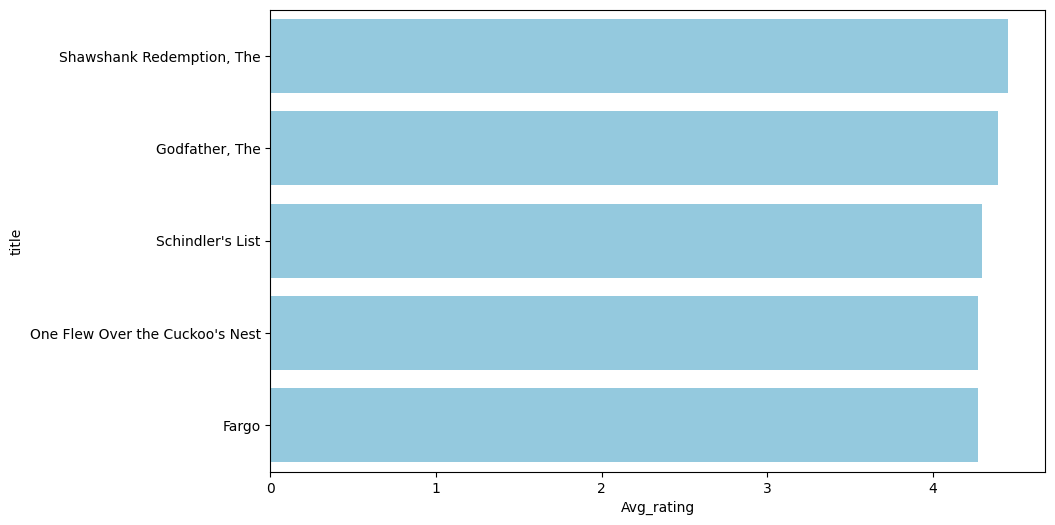

In [80]:
plt.figure(figsize=(10,6))
sns.barplot(data=Top5_Movies,x='Avg_rating',y='title',color='skyblue')
plt.xlabel('Avg_rating')
plt.ylabel('title')
plt.show()

Objective(num 2)

Create a content based recommender system :-

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
cv = TfidfVectorizer()
vectors = cv.fit_transform(Movie['genres'])     # converting raw genres docs to TF-IDF vals

In [26]:
similarity = cosine_similarity(vectors)         # taking out similarity scores of the vectors.
similarity

array([[1.        , 0.79977247, 0.1589222 , ..., 0.2638368 , 0.        ,
        0.        ],
       [0.79977247, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1589222 , 0.        , 1.        , ..., 0.60235038, 0.        ,
        0.        ],
       ...,
       [0.2638368 , 0.        , 0.60235038, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [110]:
def content_based_recommender(movie_title, Num_recommendations):
    idx = Movie[Movie['title'] == movie_title].index[0]                                                             # finding the index of the movie_title
    distance = similarity[idx]                                                                                      # get the similarity scores for the movie at the found index
    Top_Movies = sorted(list(enumerate(distance)),reverse=True,key= lambda x : x[1])[1:Num_recommendations+1]       # ignoring the first movie i.e itself
    
    sr_no = 1
    for i in Top_Movies :
        print(sr_no,i[0],Movie.iloc[i[0]].title)
        sr_no +=1
    
    recommended_titles = [Movie.iloc[i[0]].title for i in Top_Movies]
    similarity_scores = [i[1] for i in Top_Movies]
    
    plt.figure(figsize=(10,6))
    plt.bar(recommended_titles, similarity_scores, color='skyblue')
    plt.xlabel('Movie Titles')
    plt.ylabel('Similarity Score')
    plt.title(f'Top {Num_recommendations} Movies Similar to "{movie_title}"')
    plt.show()

1 1815 Antz
2 2496 Toy Story 2
3 2967 Adventures of Rocky and Bullwinkle, The
4 3166 Emperor's New Groove, The
5 3811 Monsters, Inc.


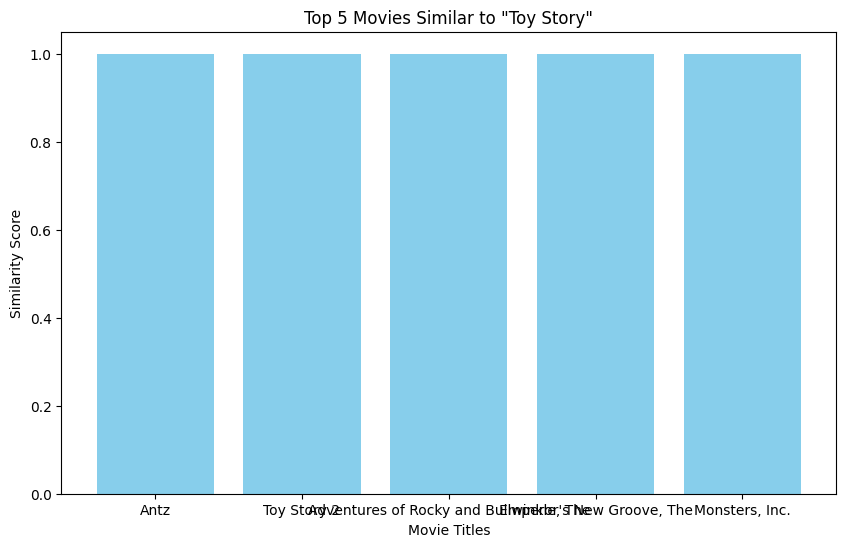

In [111]:
Top5_Content_based_Movies = content_based_recommender('Toy Story',5)

Objective(num 3)

Create a collaborative based recommender system :-

In [29]:
user_matrix = df.pivot_table(index='userId', columns='movieId', values='rating')                            # Create a user-movie matrix
user_matrix = user_matrix.fillna(0)

In [30]:
user_similarity = cosine_similarity(user_matrix)                                                            # the cosine similarity
user_similarity_df = pd.DataFrame(user_similarity, index=user_matrix.index, columns=user_matrix.index)      # Converting the similarity matrix into a dataframe with user IDs as both
user_similarity_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.101113,0.210044,0.128766,0.057896,0.077130,0.358090,0.097434,0.239189,0.026663,...,0.291162,0.144741,0.106583,0.091049,0.236805,0.154519,0.245071,0.238660,0.278217,0.153479
2,0.101113,1.000000,0.115559,0.034610,0.032705,0.028305,0.062914,0.471918,0.194232,0.000000,...,0.068325,0.000000,0.477330,0.146887,0.163553,0.061737,0.050948,0.051423,0.035907,0.064816
3,0.210044,0.115559,1.000000,0.058208,0.044426,0.012816,0.084522,0.066620,0.459703,0.068454,...,0.152078,0.301021,0.081626,0.098949,0.310234,0.079452,0.092821,0.080940,0.158943,0.109648
4,0.128766,0.034610,0.058208,1.000000,0.019298,0.005781,0.059089,0.024420,0.050572,0.000000,...,0.055860,0.024329,0.040467,0.108881,0.076241,0.014011,0.042643,0.174275,0.061677,0.157794
5,0.057896,0.032705,0.044426,0.019298,1.000000,0.053378,0.080822,0.041536,0.023168,0.011915,...,0.058450,0.007315,0.024708,0.038163,0.053085,0.048993,0.055431,0.026053,0.086667,0.068275


In [31]:
def top_k_similar_users(user_id, k):
    
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)    # Fetching the user_id from user_similarity_df with sort in(decending order)
    similar_users = similar_users.drop(user_id)

    return similar_users.head(k)


In [85]:
def collarative_based_recommender(user_id, k, Num_recommendations):

    top_k_users = top_k_similar_users(user_id, k)                                               # calling the function            
    
    top_k_users = user_matrix.loc[top_k_users.index]                                            # Extracting the users index
    aggregated_ratings = top_k_users.mean(axis=0)                                               # Extracting the Avg rating
    
    target_user_ratings = user_matrix.loc[user_id]                                              # get the ratings given by the target user
    movies_to_recommend = aggregated_ratings[target_user_ratings == 0]                          # get the movies that the target user has not rated yet
    
    top_n_movies = movies_to_recommend.sort_values(ascending=False).head(Num_recommendations)   # sorting the unrated movies(descending order)
    top_n_movies_titles = top_n_movies.index.map(Movie['title'])                                # get the tital with the help of indices

    sr_no = 1
    for i in top_n_movies_titles :                                                               # printing the vals
        print(sr_no,i)
        sr_no +=1
        
    plt.figure(figsize=(10, 6))
    plt.barh(top_n_movies_titles, top_n_movies, color='skyblue')
    plt.xlabel('Aggregated Ratings')
    plt.title(f'Top {Num_recommendations} Movie Recommendations for User {user_id}')
    plt.show()

1 Kiss Me, Guido
2 Jumanji
3 Cyrano de Bergerac
4 Crash
5 Possession


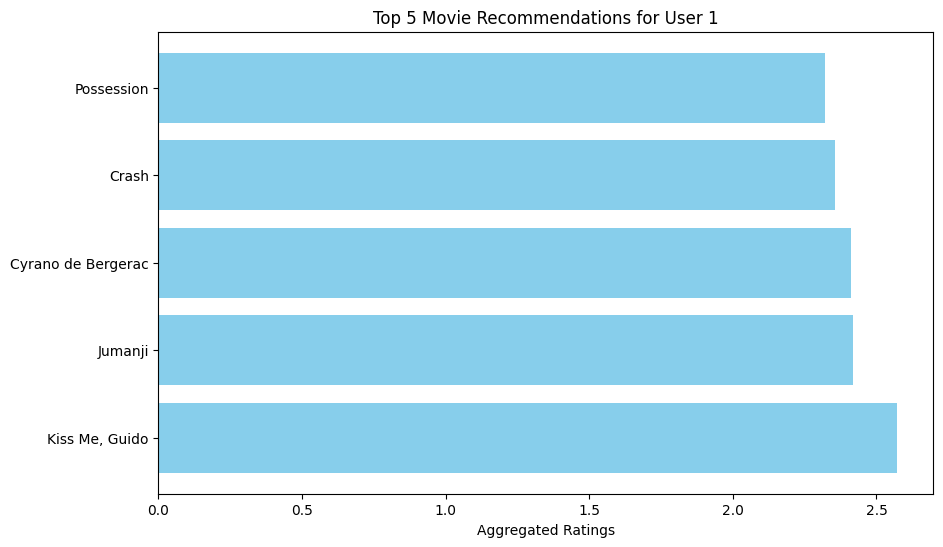

In [86]:
collab_top_movies = collarative_based_recommender(1,100,5)
collab_top_movies